In [1]:
import os
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [3]:
os.getcwd()

'c:\\Users\\ragha\\OneDrive\\Desktop\\CV COURSE\\data augmentation'

In [2]:
def visualize(img):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img)

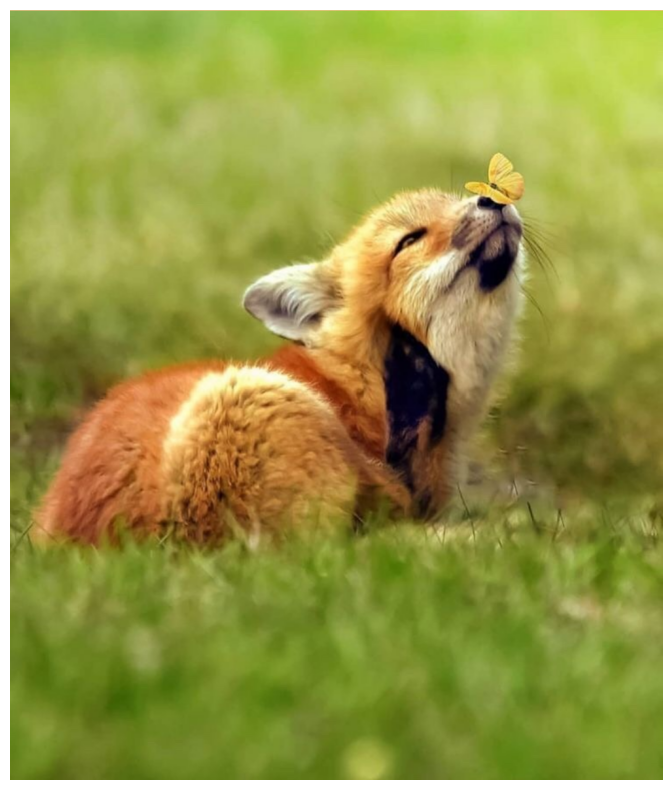

In [4]:
image=cv2.imread('../opencv/images/fox.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
visualize(image)

## few image transformation with visualizations

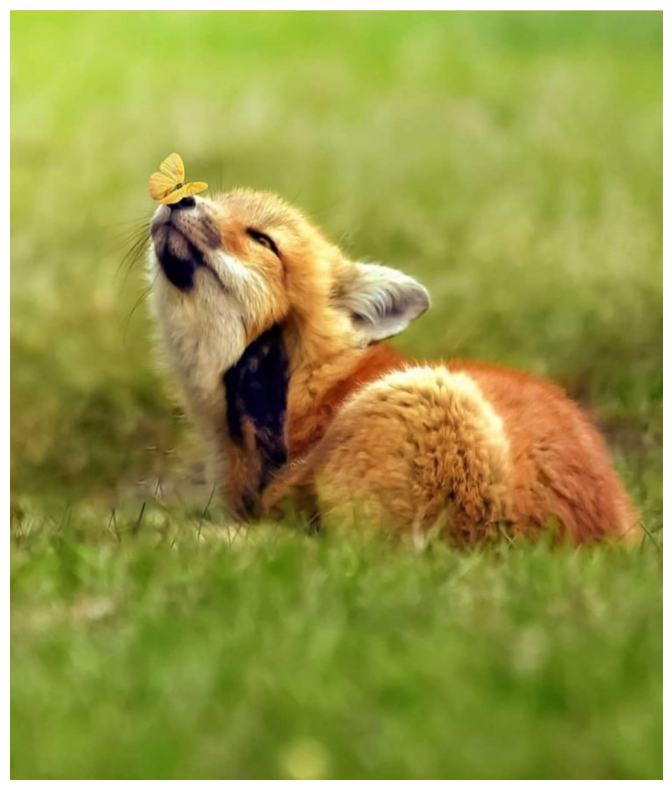

In [25]:
transform=A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

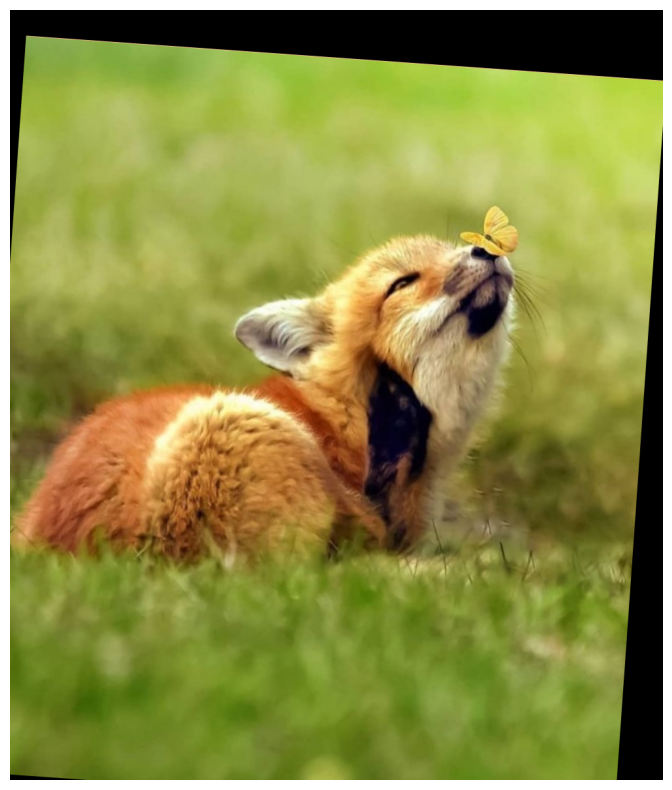

In [27]:
transform=A.ShiftScaleRotate(p=0.5)
random.seed(7)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

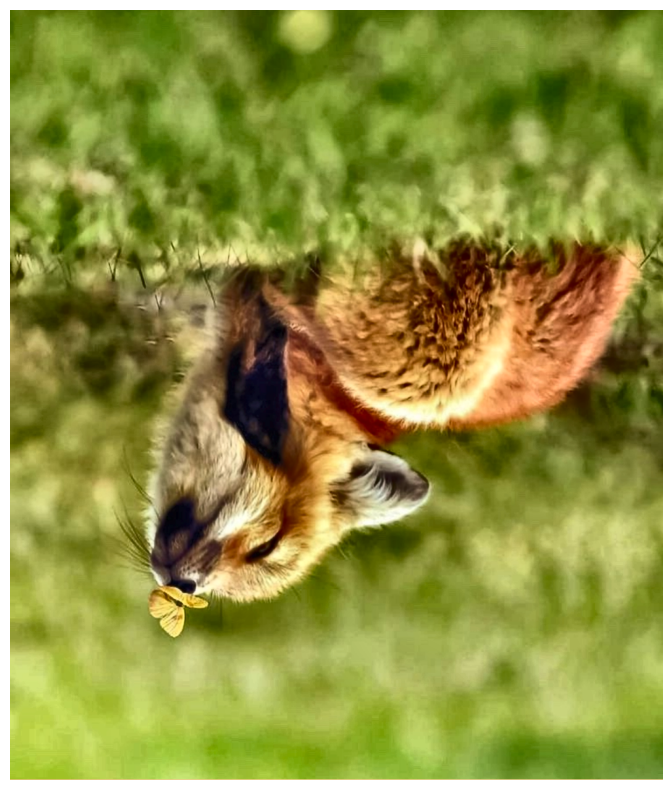

In [30]:
transform=A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625,scale_limit=0.5,rotate_limit=45,p=0.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue()
])
random.seed(42)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

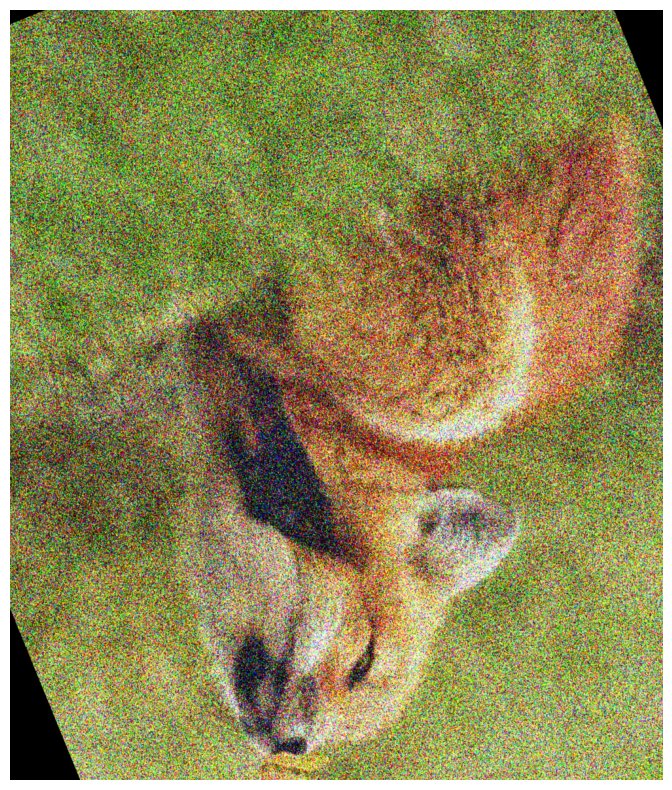

In [33]:
transform=A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.Transpose(),
    A.GaussNoise(),
    A.OneOf([
        A.Blur(blur_limit=3,p=0.1),
        A.MedianBlur(blur_limit=3,p=0.1),
        A.MotionBlur(p=0.2)
    ],p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625,scale_limit=0.5,rotate_limit=45,p=0.75),
    A.OneOf([
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
    ],p=0.3),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.RandomBrightnessContrast()
    ],p=0.3),
    A.HueSaturationValue(p=0.3)
])
random.seed(42)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

In [34]:
def create_augmentations():
    return A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.2),
        A.RandomRotate90(p=0.3),
        A.Transpose(p=0.2),
        ToTensorV2()
    ])

In [37]:
def augment_images(in_folder,out_folder,num_augmented_images=10):
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    image_files=[f for f in os.listdir(in_folder) if f.lower().endswith(('png','jpg','jpeg'))]
    augmenter=create_augmentations()
    for image_file in tqdm(image_files,desc="Processing Images"):
        image_path=os.path.join(in_folder,image_file)
        image=cv2.imread(image_path)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        base_name=os.path.splitext(image_file)[0]
        for i in range(num_augmented_images):
            augmented=augmenter(image=image)['image']
            augmented=augmented.permute(1,2,0).numpy()
            augmented=(augmented*255).astype(np.uint8)
            output_path=os.path.join(out_folder,f'{base_name}_aug_{i}.jpg')
            cv2.imwrite(output_path,cv2.cvtColor(augmented,cv2.COLOR_RGB2BGR))
    print(f'augmented images saved to {out_folder}')
    

In [38]:
input_f='images'
output_f='aug_images'
num_aug_per_image=15
augment_images(input_f,output_f,num_aug_per_image)


Processing Images: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

augmented images saved to aug_images
